# Exercise 1: Boston house price predicion

Goal of the exercise: Get the basics of keras and linear recressions

Steps:
1. Load data
2. Visualise data
4. Define the model
5. Train the model
6. Evaluate

## Load Open Source Machine Learning Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = [12.0, 8.0]
%matplotlib inline

## Load Keras, one of the most popular Open Source Deep Learning library

In [2]:
# Keras is an easy to use Deep Learning library for Python
import keras

from keras import backend as K

# Load Sequential model architecture
from keras.models import Sequential

# Load Dense and Dropout layers ?
from keras.layers import Dense, Dropout

# Load RMSprop optimizer to minimize cost to train the network
from keras.optimizers import RMSprop

Using TensorFlow backend.
/Users/tkin/wrk/analytics_weekly/ml-crash-course/mlenv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Loading data

In [3]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data[:, boston.feature_names.tolist().index('RM')]

# Target / desired output
y = boston.target

## Visualising data
It is a good idea to visualise the data before running any machine learning algorithms to see if the data makes any sense and if it is possible to learn from the data.

Text(0,0.5,'Average price of the house')

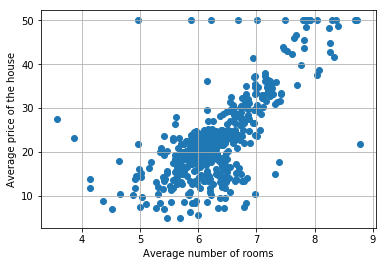

In [4]:
pylab.scatter(X, y)
pylab.grid()
pylab.xlabel('Average number of rooms')
pylab.ylabel('Average price of the house')

## Define the model

In [25]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# In linear regression we don't have hidden layers. Just the output which is connected to input.
model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop())

## Train the model

### Split data into training and testing sets
In order to be able to evaluate the model, we need to split the data into training and testing.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train the model

In [34]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=0)

In [35]:
xs = np.linspace(X.min(), X.max(),100)

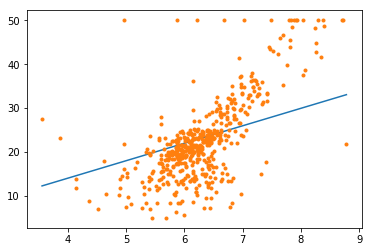

In [36]:
pylab.figure()
pylab.plot(xs, model.predict(xs))
pylab.plot(X, y, '.')

## Evaluate the model

In [37]:
train_error = model.evaluate(x_train, y_train, verbose=0)
test_error = model.evaluate(x_test, y_test, verbose=0)
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=58.307476 test error=51.217848
